In [1]:
# Load Mask
# Load EDT
# Sample Key Points
# Load SAM
# Load CropImage
# PerFrame Inference
# Results Merge

## Load SAM

In [2]:
from load_SAM import *
SAMPredictor = load_SAM()

## Load Predictions

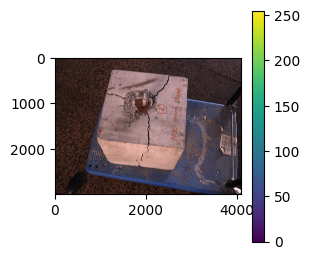

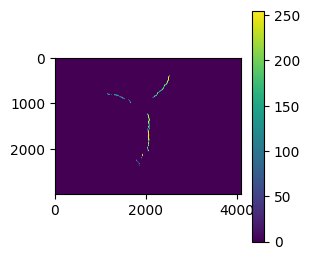

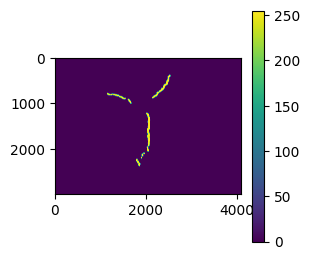

In [3]:
from utils import *
from load_images import ImageLoader
from mask_process import *
import os
root_path= "/home/jc/jiapeng/bridge_circle2_20240319/2757/"
image_sub_folder = "images2/"
mask_sub_folder = "mask/"

files = os.listdir(root_path+image_sub_folder)

# Filter and modify the file names
filtered_files = [os.path.splitext(file)[0] if file.endswith(('.png', '.jpg')) else file for file in files]
# file_name = "1710833285.235430"
# file_name = "1710833307.961126"
# file_name = "1710833308.765126"
# file_name = "1710833378.149605"
file_name = "1710833389.585020"
# file_name = filtered_files[101]
image_path = root_path + image_sub_folder + file_name + ".jpg"
mask_path = root_path + mask_sub_folder + file_name + ".png"
image_loader = ImageLoader(image_path, mask_path)



# show_img_in_jupyter(dilated_image)
image_loader.dialate_mask()
clusters = image_loader.clustering()
crop_bundles = image_loader.get_crop_bundle()


show_img_in_jupyter(image_loader.get_image())
show_img_in_jupyter(image_loader.get_mask())
show_img_in_jupyter(image_loader.get_diatalted_mask())

Number of Clusters:  6
Crop Bundle:  0


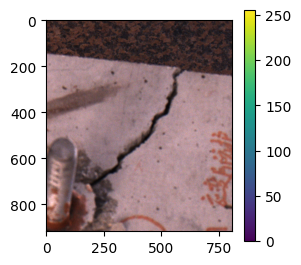

Crop Bundle:  1


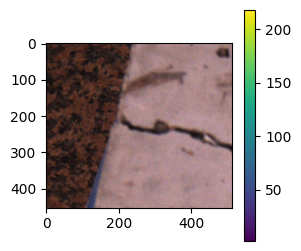

Crop Bundle:  2


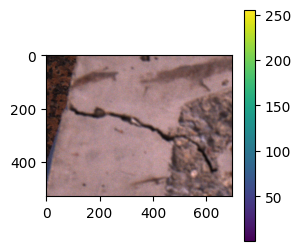

Crop Bundle:  3


In [4]:
print("Number of Clusters: ", len(clusters))
k = 3

for i, crop_bundle in enumerate(crop_bundles):
    print("Crop Bundle: ", i)
    if i ==k:
        break
    show_img_in_jupyter(crop_bundle[0])

17


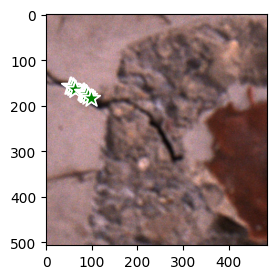

In [5]:
pts, label = EDT_to_pts(crop_bundle[2])

print(len(pts))
plt.figure(figsize=(3,3))
plt.imshow(crop_bundle[0])
show_points(pts, label, plt.gca())
plt.axis('on')
plt.show()  

In [6]:
SAMPredictor.set_image(crop_bundle[0])


masks, scores, logits = SAMPredictor.predict(
    point_coords=pts,
    point_labels=label,
    multimask_output=True,
)

9.848857801796104


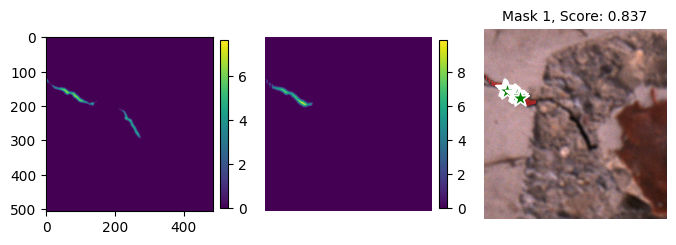

11.704699910719626


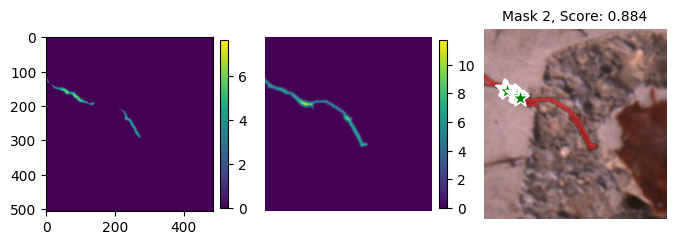

11.704699910719626


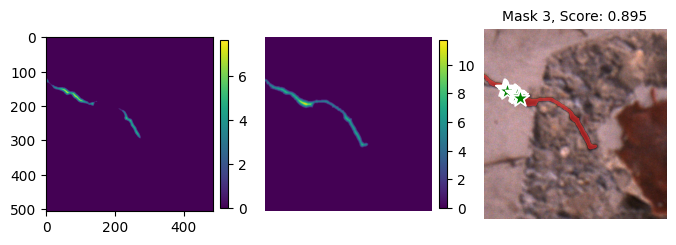

In [7]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    fig,axe = plt.subplots(1,3, figsize=(8,6))

    image1 = axe[0].imshow(crop_bundle[2],cmap='viridis')
    image2 = axe[2].imshow(crop_bundle[0])


    color = np.array([255/255])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1) 
    EDT = mask_EDT(mask_image)
    image3 = axe[1].imshow(EDT,cmap='viridis')
    print(get_EDT_max(EDT))

    if get_EDT_max(EDT) > 2*get_EDT_max(crop_bundle[2]):
        print("Rejection")

    show_mask(mask,axe[2])
    show_points(pts, label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=10)
    fig.colorbar(image1, ax=axe[0],fraction=0.046, pad=0.04)
    fig.colorbar(image3, ax=axe[1],fraction=0.046, pad=0.04)
    # fig.colorbar(image3, ax=axe[2],fraction=0.046, pad=0.14)
    axe[1].axis('off')
    axe[2].axis('off')
    plt.show()  